In [14]:
import sys
sys.path.append('../')

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from src.data_processing.io.image import Image
from src.base.line import Line

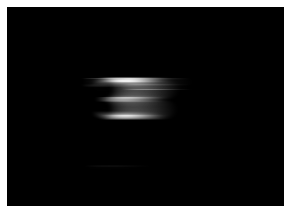

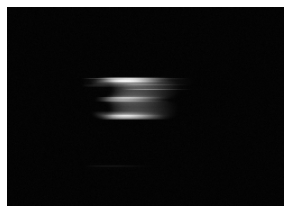

In [17]:
blured_img = Image.from_dat("../data/blur_221x307.dat", w=221, h=307)
noised_img = Image.from_dat("../data/blur_221x307_N.dat", w=221, h=307)

blured_img.plot()
noised_img.plot()

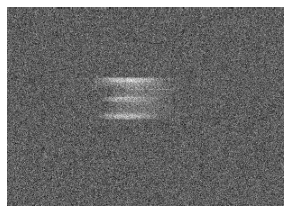

In [18]:
diff = blured_img - noised_img
diff.plot()

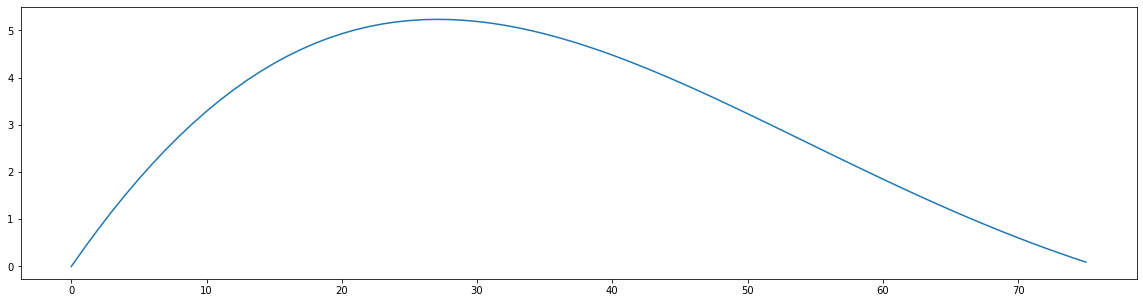

In [29]:
kernel = Line.from_dat("../data/kernD76_f4.dat")
plt.figure(figsize=(20, 5))
kernel.plot()

In [21]:
from src.data_processing.analysis import dft, get_frequency_spectrum

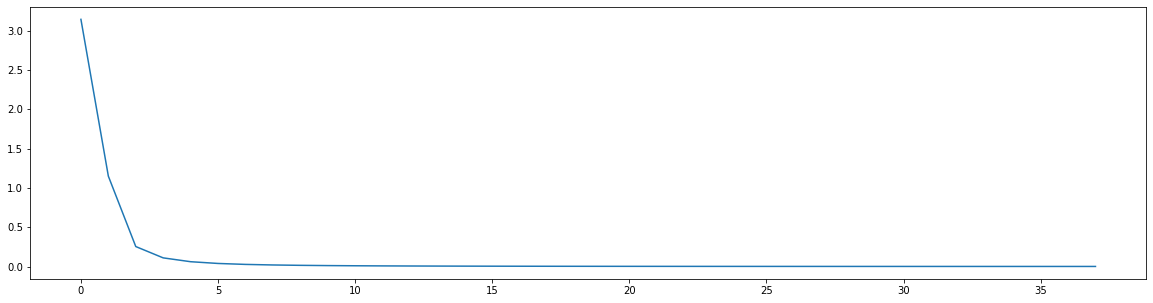

In [22]:
plt.figure(figsize=(20, 5))
get_frequency_spectrum(dft(kernel)).plot()

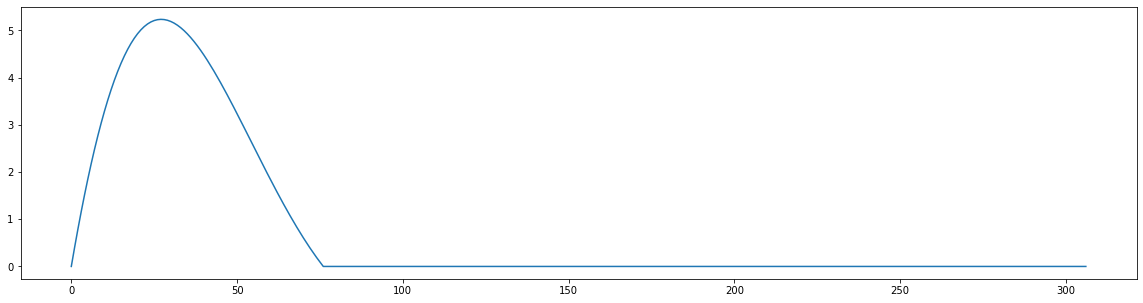

In [23]:
padded_kernel = kernel ** Line.linear(0, 0, range(231))
plt.figure(figsize=(20, 5))
padded_kernel.plot()

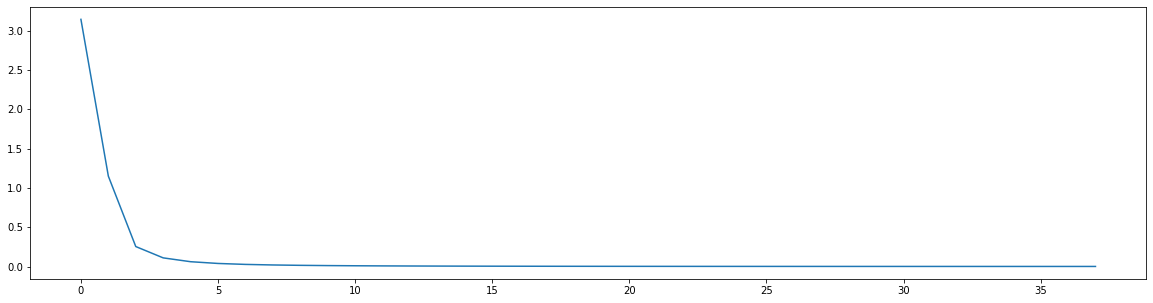

In [24]:
plt.figure(figsize=(20, 5))
get_frequency_spectrum(dft(kernel)).plot()

In [25]:
test_line_blured = Line(blured_img.img[90])
test_line_noised = Line(noised_img.img[90])

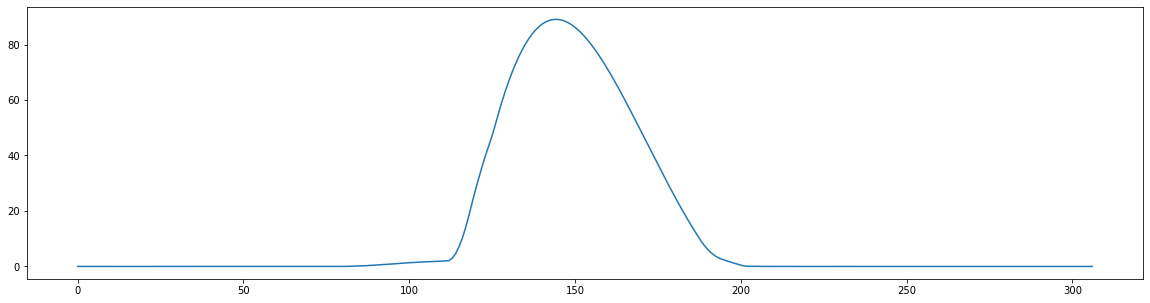

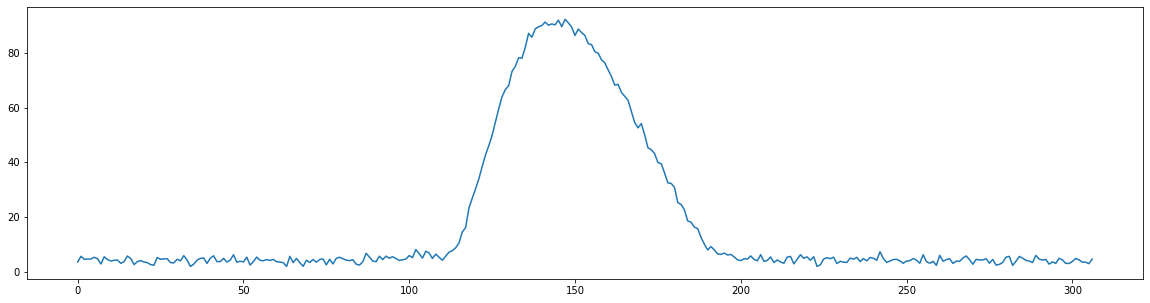

In [26]:
plt.figure(figsize=(20, 5))
test_line_blured.plot()
plt.figure(figsize=(20, 5))
test_line_noised.plot()

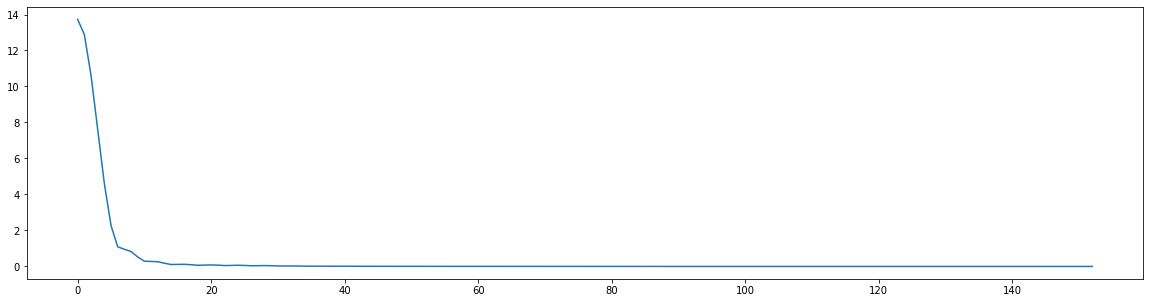

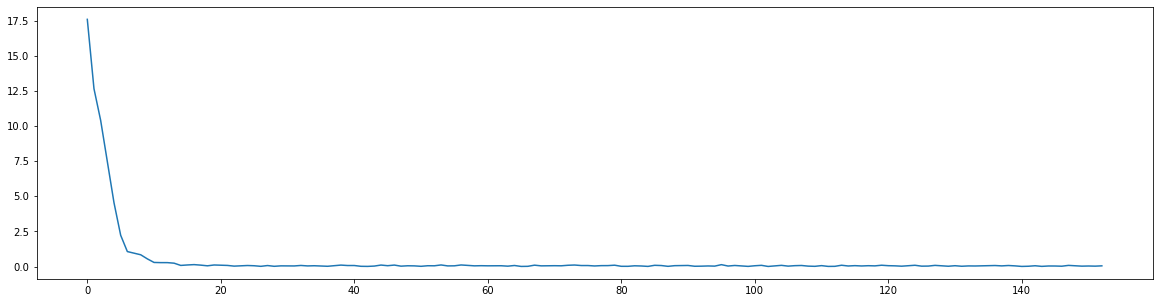

In [27]:
plt.figure(figsize=(20, 5))
get_frequency_spectrum(dft(test_line_blured)).plot()
plt.figure(figsize=(20, 5))
get_frequency_spectrum(dft(test_line_noised)).plot()

In [20]:
from src.data_processing.proc import deconvolution
from src.data_processing.proc.conv import deconv_pic, deconv_pic_reg

In [30]:
deconv_blurred = deconvolution(test_line_blured, padded_kernel)
deconv_noised = deconvolution(test_line_noised, padded_kernel)

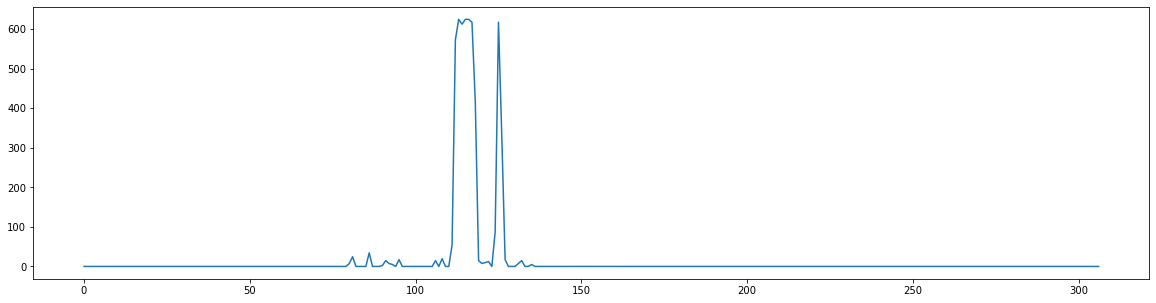

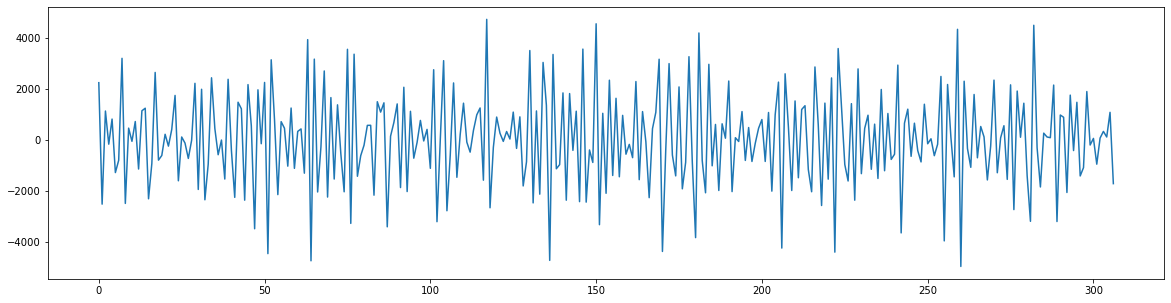

In [31]:
plt.figure(figsize=(20, 5))
deconv_blurred.plot()
plt.figure(figsize=(20, 5))
deconv_noised.plot()

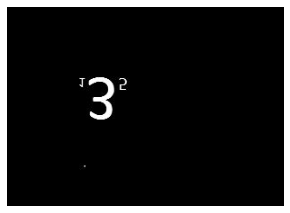

In [32]:
deconv_blured_image = deconv_pic(blured_img, padded_kernel)
deconv_blured_image.plot()

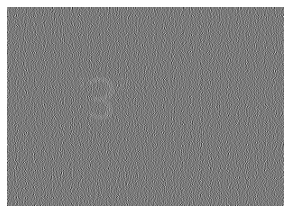

In [33]:
deconv_noised_image = deconv_pic(noised_img, padded_kernel)
deconv_noised_image.plot()

In [ ]:
0.00001 и 0.0001

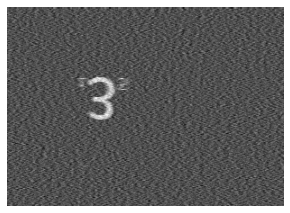

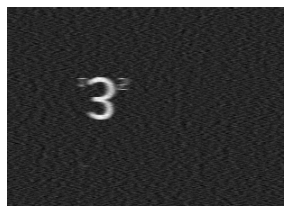

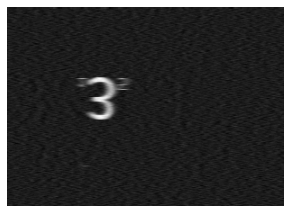

In [28]:
deconv_noised_image1 = deconv_pic_reg(noised_img, padded_kernel, 0.00001)
deconv_noised_image1.plot()
deconv_noised_image2 = deconv_pic_reg(noised_img, padded_kernel, 0.00005)
deconv_noised_image2.plot()
deconv_noised_image3 = deconv_pic_reg(noised_img, padded_kernel, 0.0001)
deconv_noised_image3.plot()

In [ ]:
from bqplot import pyplot as plt
import ipywidgets as widgets
import numpy as np

In [ ]:
# generate some fake 
n = 2000
x = np.linspace(0.0, 10.0, n)
np.random.seed(0)
y = np.cumsum(np.random.randn(n)*10).astype(int)

In [ ]:
fig_hist = plt.figure( title='Histogram')
hist = plt.hist(y, bins=25)

In [ ]:
hist.bins = 10;

In [ ]:
slider = widgets.IntSlider(description='Bins number', min=1, max=100, v_model=30)

In [ ]:
widgets.link((hist, 'bins'), (slider, 'value'))

fig_lines = plt.figure( title='Line Chart')
lines = plt.plot(x, y)

fig_lines.layout.width = 'auto'
fig_lines.layout.height = 'auto'
fig_hist.layout.width = 'auto'
fig_hist.layout.height = 'auto'

grid_layout = widgets.GridspecLayout(5, 3)

grid_layout[:2, :] = fig_lines
grid_layout[2:4, :] = fig_hist
grid_layout[4, 1] = slider

grid_layout.layout.height = '1000px'

grid_layout

In [ ]:
selector = plt.brush_int_selector()
def update_range(*ignore):
    if selector.selected is not None and len(selector.selected) == 2:
        xmin, xmax = selector.selected
        mask = (x > xmin) & (x < xmax)
        hist.sample = y[mask]
selector.observe(update_range, 'selected')        